## Portfolio Assignment 1: Basic Image Processing

Create or find small dataset of images, using an online data source such as Kaggle. At the very least, your dataset should contain no fewer than 10 images.

Write a Python script which does the following:

1. For each image, find the width, height, and number of channels
2. For each image, split image into four equal-sized quadrants (i.e. top-left, top-right, bottom-left, bottom-right)
3. Save each of the split images in JPG format
4. Create and save a file containing the filename, width, height for all of the new images.

__TASK 1: FIND WIDTH, HEIGHT, AND NUMBER OF CHANNELS FOR EACH IMAGE__

In [3]:
# Importing the libraries that I need to solve the tasks
import sys
import os
sys.path.append(os.path.join("..")) # enabling communication with home directory
import cv2 # OpenCSV
from utils.imutils import jimshow # enabling preview of images 
import glob # used to retrieve files 
import pandas as pd # used to create dataframes
import csv # used to write csv files 

In [3]:
# Creating a datapath to the folder with a small dataset of images found on Kaggle
data_path = os.path.join("..", "data", "random_images")

In [4]:
# Creating a loop that loops over each image in the folder and finds the height, width, and number of channels
# Since an image is basically just an array, I can use indexing to find the height, width, and number of channels of each image
for img in glob.glob(os.path.join("..", "data", "random_images/*.jpg")):
    image = cv2.imread(img) # reading image
    height = image.shape[0] # finding the height
    width = image.shape[1] # finding the width
    number_of_channels = image.shape[2] # finding the number of channels
    # Printing results:
    print(f"{img} has a height of {height} pixels")
    print(f"{img} has a width of {width} pixels")
    print(f"{img} has {number_of_channels} channels")

../data/random_images/cat_0009.jpg has a height of 239 pixels
../data/random_images/cat_0009.jpg has a width of 418 pixels
../data/random_images/cat_0009.jpg has 3 channels
../data/random_images/car_0002.jpg has a height of 100 pixels
../data/random_images/car_0002.jpg has a width of 100 pixels
../data/random_images/car_0002.jpg has 3 channels
../data/random_images/airplane_0005.jpg has a height of 85 pixels
../data/random_images/airplane_0005.jpg has a width of 305 pixels
../data/random_images/airplane_0005.jpg has 3 channels
../data/random_images/car_0008.jpg has a height of 100 pixels
../data/random_images/car_0008.jpg has a width of 100 pixels
../data/random_images/car_0008.jpg has 3 channels
../data/random_images/cat_0004.jpg has a height of 219 pixels
../data/random_images/cat_0004.jpg has a width of 452 pixels
../data/random_images/cat_0004.jpg has 3 channels
../data/random_images/dog_0002.jpg has a height of 475 pixels
../data/random_images/dog_0002.jpg has a width of 249 pixel

__TASK 2: SPLIT IMAGE INTO FOUR EQUAL-SIZED QUADRANTS__

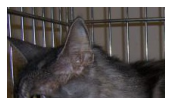

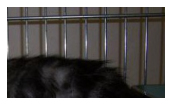

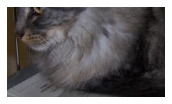

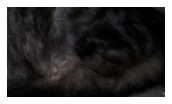

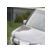

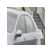

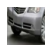

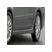

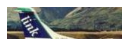

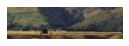

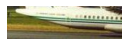

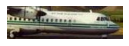

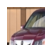

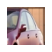

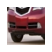

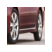

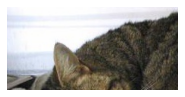

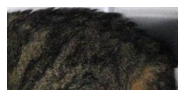

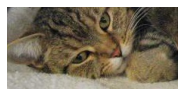

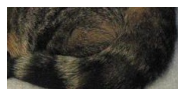

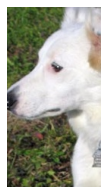

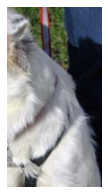

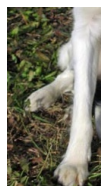

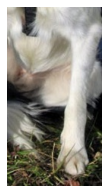

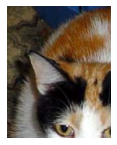

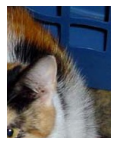

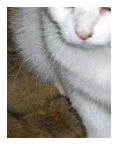

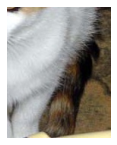

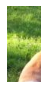

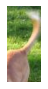

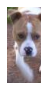

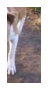

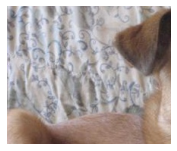

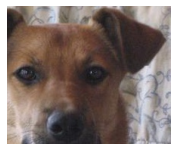

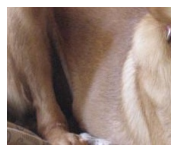

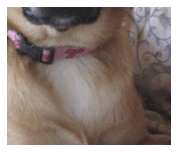

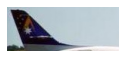

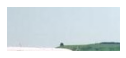

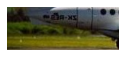

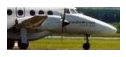

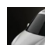

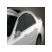

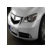

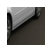

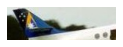

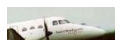

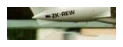

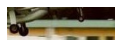

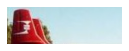

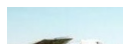

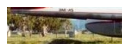

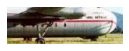

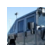

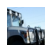

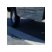

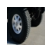

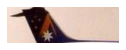

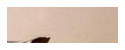

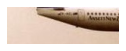

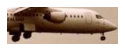

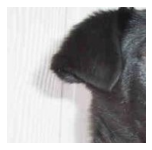

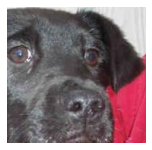

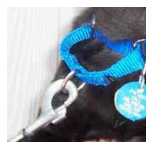

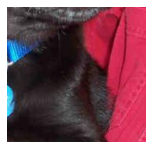

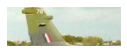

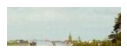

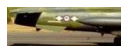

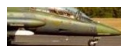

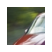

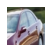

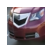

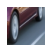

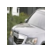

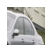

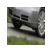

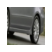

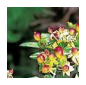

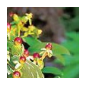

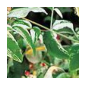

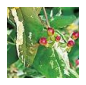

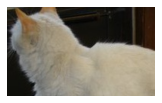

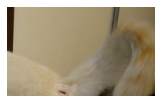

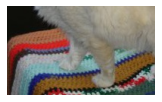

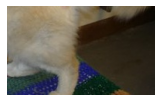

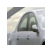

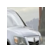

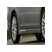

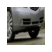

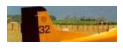

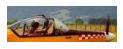

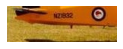

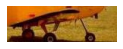

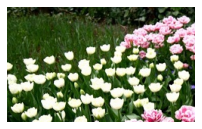

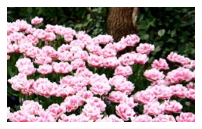

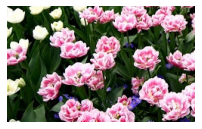

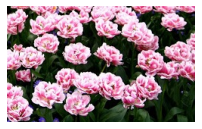

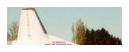

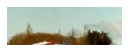

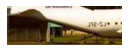

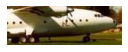

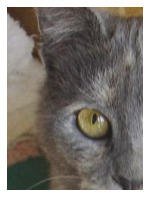

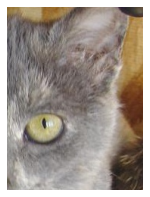

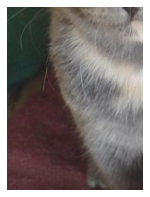

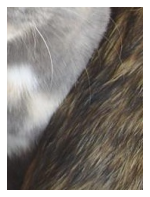

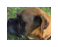

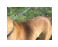

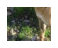

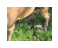

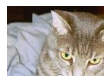

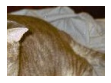

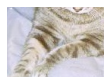

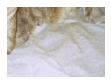

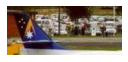

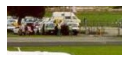

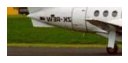

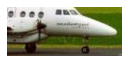

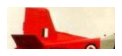

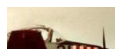

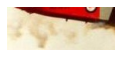

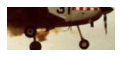

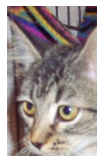

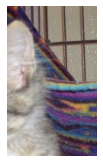

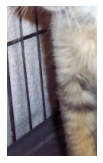

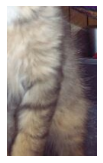

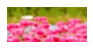

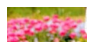

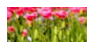

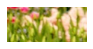

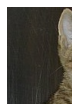

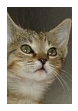

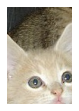

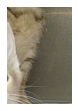

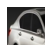

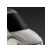

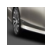

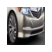

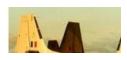

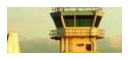

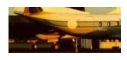

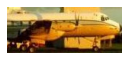

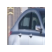

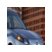

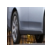

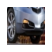

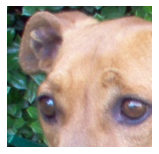

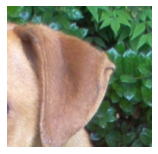

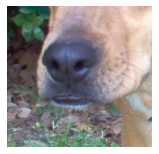

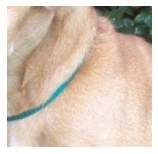

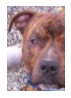

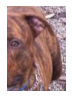

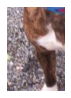

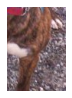

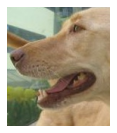

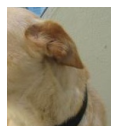

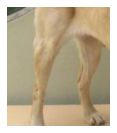

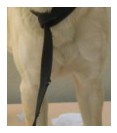

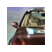

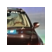

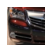

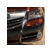

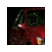

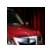

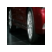

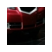

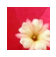

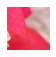

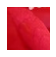

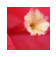

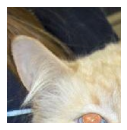

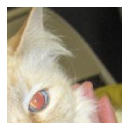

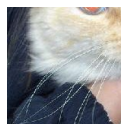

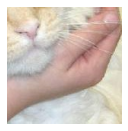

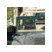

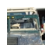

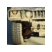

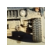

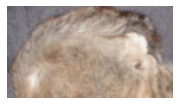

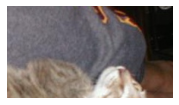

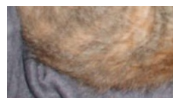

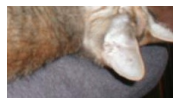

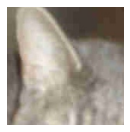

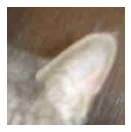

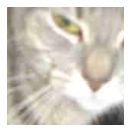

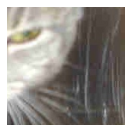

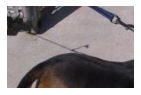

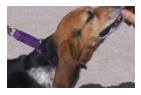

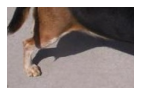

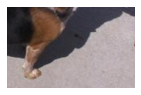

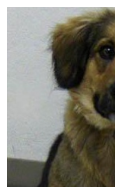

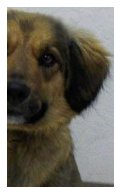

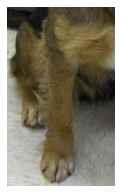

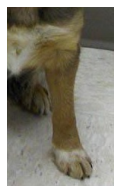

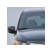

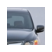

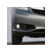

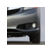

In [5]:
# To split each image into four equal-sized quadrants I am going to make a loop and use the slicing method
# Since the images do not have the same height and width I need to make the slices according to each individual image height and width

for img in glob.glob(os.path.join("..", "data", "random_images/*.jpg")):
    image = cv2.imread(img) # reading image
    
    height = image.shape[0] # determining height
    half_height = round(height/2) # determining half of the height for each image
    width = image.shape[1] # determining width
    half_width = round(width/2) # determining half of the width of for each image
    
    # Now I need to slice the images into four quadrants. I do this by indicating a slice of rows as the first index and a slice of columns as the second index 
    top_left = image[0:half_height, 0:half_width] # top left 
    top_right = image[0:half_height, half_width:width] # top right
    bottom_left = image[half_height:height, 0:half_width] # bottom left
    bottom_right = image[half_height:height, half_width:width] # bottom right
    
    # Showing the images to make sure that it worked 
    jimshow(top_left)
    jimshow(top_right)
    jimshow(bottom_left)
    jimshow(bottom_right)
    
    # Each image has now been split into four equal-sized quadrants


__TASK 3: SAVE EACH SPLIT IMAGE IN JPG FORMAT__

In [29]:
# In order to save each split image as a .jpg file I am going to use the imwrite() function from the OpenCV module (cv2)

for img in glob.glob(os.path.join("..", "data", "random_images/*.jpg")):
    
    # Reading the images and finding their height and width
    image = cv2.imread(img)
    height = image.shape[0]
    half_height = round(height/2)
    width = image.shape[1]
    half_width = round(width/2)
    
    # Split images into equal-sized quadrants using slicing
    top_left = image[0:half_height, 0:half_width]
    top_right = image[0:half_height, half_width:width]
    bottom_left = image[half_height:height, 0:half_width] 
    bottom_right = image[half_height:height, half_width:width]
    
    # Specifying an output path for the new images
    output_path = os.path.join("..", "data", "random_images")
    
    # Making individual filenames by splitting the path for each image and taking the last part of the path to use as an ID
    _, filename = os.path.split(img)
    
    # Making JPG files by joing the output path with the particular filename for each individual image
    top_left_jpg = os.path.join(output_path, f"split_top_left_{filename}")
    top_right_jpg = os.path.join(output_path, f"split_top_right_{filename}")
    bottom_left_jpg = os.path.join(output_path, f"split_bottom_left_{filename}")
    bottom_right_jpg = os.path.join(output_path, f"split_bottom_right_{filename}")

    # Saving the images 
    cv2.imwrite(top_left_jpg, top_left)
    cv2.imwrite(top_right_jpg, top_right)
    cv2.imwrite(bottom_left_jpg, bottom_left)
    cv2.imwrite(bottom_right_jpg, bottom_right)

__TASK 4: CREATE AND SAVE FILE__

In [23]:
# In order to create a file that contains the filename, height, and width of the new images that I have created I am going to use the pandas module to create a dataframe as well as the csv module to write a CSV-file

# First I create an empty list of lists that contains the information that needs to be present in the file
info = {'filename': [],
        'height': [],
        'width': []}

# I then create an empty dataframe based on the list I created above. I make sure to create the necessary columns
dataframe = pd.DataFrame(info, columns = ['filename', 'height', 'width'])

# I then loop through each of the new images that all contain "split" in their name and append the dataframe with the information for each individual image
for img in glob.glob(os.path.join("..", "data", "random_images/split*.jpg")):
        image = cv2.imread(img) # reading image
        height = image.shape[0] # determining the height 
        width = image.shape[1] # determining the width
        
        # Filling in the list of information for each particular image
        info = {'filename':  [img],
                'height': [height],
                'width': [width]}
        
        # Appending to the empty dataframe that I created outside the loop
        dataframe = dataframe.append(pd.DataFrame(info, columns = ['filename', 'height', 'width']))
        
        # Making sure that it looks right 
        print(dataframe)
        
        # Saving the dataframe as a csv-file
        dataframe.to_csv(r'../data/random_images/new_images_info.csv', index = False)
        
# I now have a CSV-file named "new_images_info.csv" that contains the filename, height, and width for each of the new images


                                            filename  height  width
0  ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
                                            filename  height  width
0  ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0  ../data/random_images/split_top_left_airplane_...    48.0  148.0
                                            filename  height  width
0  ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0  ../data/random_images/split_top_left_airplane_...    48.0  148.0
0  ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
                                            filename  height  width
0  ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0  ../data/random_images/split_top_left_airplane_...    48.0  148.0
0  ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0  ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
                                            file

                                            filename  height  width
0  ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0  ../data/random_images/split_top_left_airplane_...    48.0  148.0
0  ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0  ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0  ../data/random_images/split_bottom_left_car_00...    50.0   50.0
0  ../data/random_images/split_bottom_left_car_00...    50.0   50.0
0  ../data/random_images/split_top_right_flower_0...    94.0   95.0
0  ../data/random_images/split_top_left_dog_0006.jpg   186.0  192.0
0  ../data/random_images/split_top_right_airplane...    44.0  143.0
0  ../data/random_images/split_top_left_car_0010.jpg    50.0   50.0
0  ../data/random_images/split_top_left_dog_0000.jpg    44.0   58.0
0  ../data/random_images/split_top_left_airplane_...    42.0  152.0
0  ../data/random_images/split_top_right_dog_0009...   182.0  217.0
0  ../data/random_images/split_top_left_car_0009

                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data/random_images/split_top_left_airplane_...    48.0  148.0
0   ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0   ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
..                                                ...     ...    ...
0   ../data/random_images/split_top_right_car_0004...    50.0   50.0
0   ../data/random_images/split_top_left_car_0000.jpg    50.0   50.0
0   ../data/random_images/split_top_right_cat_0006...   156.0  155.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
0   ../data/random_images/split_top_left_airplane_...    49.0  152.0

[66 rows x 3 columns]
                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data

                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data/random_images/split_top_left_airplane_...    48.0  148.0
0   ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0   ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
..                                                ...     ...    ...
0   ../data/random_images/split_top_left_car_0001.jpg    50.0   50.0
0   ../data/random_images/split_bottom_right_cat_0...   128.0   85.0
0   ../data/random_images/split_bottom_right_dog_0...   237.0  125.0
0   ../data/random_images/split_bottom_left_cat_00...    93.0  128.0
0   ../data/random_images/split_bottom_left_dog_00...   179.0  183.0

[98 rows x 3 columns]
                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data

                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data/random_images/split_top_left_airplane_...    48.0  148.0
0   ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0   ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
..                                                ...     ...    ...
0   ../data/random_images/split_bottom_left_airpla...    49.0  148.0
0   ../data/random_images/split_top_right_car_0002...    50.0   50.0
0   ../data/random_images/split_bottom_right_dog_0...   111.0   77.0
0   ../data/random_images/split_top_right_airplane...    47.0  145.0
0   ../data/random_images/split_bottom_right_car_0...    50.0   50.0

[130 rows x 3 columns]
                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../dat

                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data/random_images/split_top_left_airplane_...    48.0  148.0
0   ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0   ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
..                                                ...     ...    ...
0   ../data/random_images/split_top_right_cat_0002...   128.0   85.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
0   ../data/random_images/split_bottom_left_flower...    46.0  105.0
0   ../data/random_images/split_top_left_airplane_...    61.0  150.0
0   ../data/random_images/split_top_right_airplane...    42.0  153.0

[161 rows x 3 columns]
                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../dat

                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../data/random_images/split_top_left_airplane_...    48.0  148.0
0   ../data/random_images/split_bottom_left_dog_00...   237.0  124.0
0   ../data/random_images/split_bottom_left_cat_00...   242.0  180.0
0   ../data/random_images/split_bottom_left_car_00...    50.0   50.0
..                                                ...     ...    ...
0   ../data/random_images/split_bottom_left_dog_00...   107.0  168.0
0   ../data/random_images/split_bottom_right_cat_0...   119.0  209.0
0   ../data/random_images/split_top_left_flower_00...    94.0   95.0
0   ../data/random_images/split_bottom_left_cat_00...   156.0  154.0
0   ../data/random_images/split_top_right_cat_0008...   174.0  137.0

[191 rows x 3 columns]
                                             filename  height  width
0   ../data/random_images/split_bottom_right_dog_0...   183.0  217.0
0   ../dat